# Manifold Learning Methods

## MNIST Digits

Use data form https://www.kaggle.com/c/digit-recognizer/data and suppose that files test.csv and train.csv are in same folder as notebook. You can use subsamples to spead up your calculations.

In [63]:
from IPython.display import Latex

In [55]:
# (1 point) load train data, save class labels, plot first point as a digit
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas

# train_data = pandas.read_csv('train.csv', header=None)
train_data = pandas.read_csv('train.csv', nrows=5000)
classes = train_data.head(n=1)

In [56]:
color = train_data['label']

del train_data['label']
# print(classes.index)
# train_data.drop(train_data.head(1).index, inplace=True)

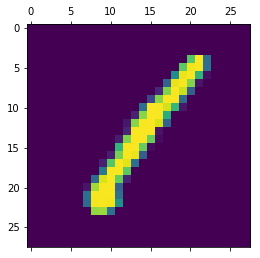

In [57]:
# plt.gray() 
# print(train_data.head(1).values)

plt.matshow(train_data.iloc[0].values.reshape(28, -1)) 
plt.show() 

In [58]:
# Apply Isomap, Locally Linear Embedding, Spectral Embedding, Local Tangent Space Alignment, Multi-dimensional Scaling, t-distributed Stochastic Neighbor Embedding
# (5 points) apply methods to reduce dimension to two
# (3 points) plot results where the different digits are represented with different styles/colors
# (1 point) apply Out-of-Sample Isomap to an arbitrary point
# (1 point) make a conclusion

## Apply methods to reduce dimension to two and plot results where the different digits are represented with different styles/colors

In [59]:
import math
import sklearn.manifold

### Apply Isomap

In [16]:
model = sklearn.manifold.Isomap(n_neighbors=10, n_components=2)
model.fit(train_data)
transformed_train_data = model.transform(train_data)

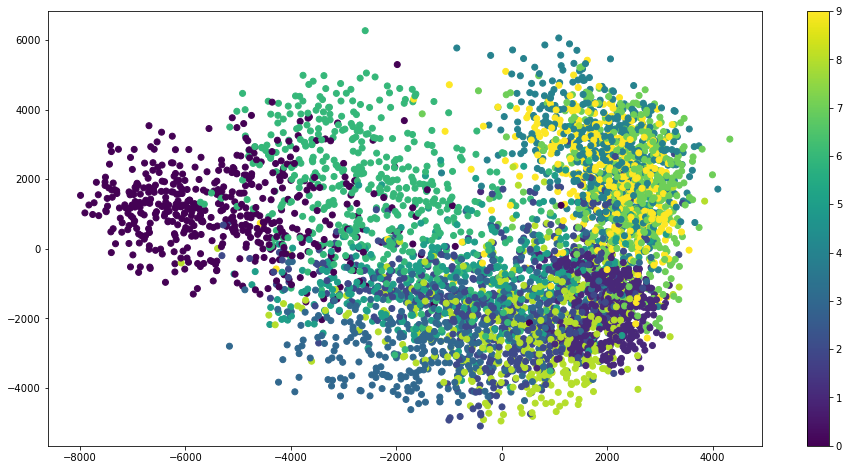

In [17]:
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=2, random_state=0).fit(train_data)

plt.figure(figsize=(16,8))
plt.scatter(transformed_train_data[:, 0], transformed_train_data[:, 1], c=color)
plt.colorbar()

## Apply Out-of-Sample Isomap to an arbitrary point

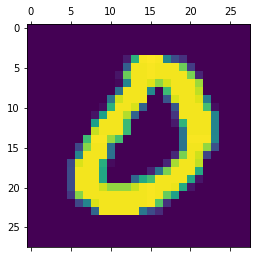

In [28]:
points = pandas.read_csv('test.csv', nrows=10)
point_number = 6
point = points.iloc[point_number].values
plt.matshow(point.reshape(28, -1)) 
plt.show() 

In [29]:
point = point.reshape(1,-1)
transformed_point = model.transform(point)

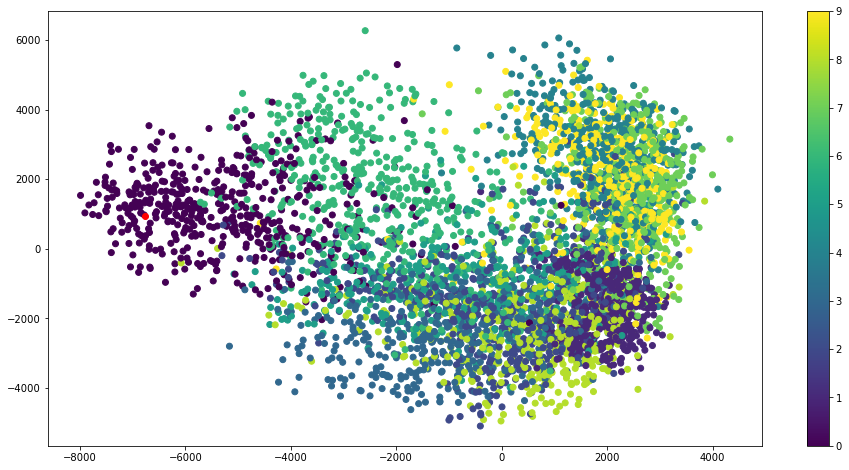

In [30]:
plt.figure(figsize=(16,8))
plt.scatter(transformed_train_data[:, 0], transformed_train_data[:, 1], c=color)
plt.colorbar()
plt.scatter(transformed_point[:, 0], transformed_point[:, 1], c='r')

Специально подобрал четко прорисованный ноль, который четко лежит в месте, где находятся нули.

В случае, если цифра изначально нарисована не очень хорошо, не все так гладко:

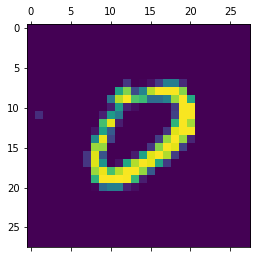

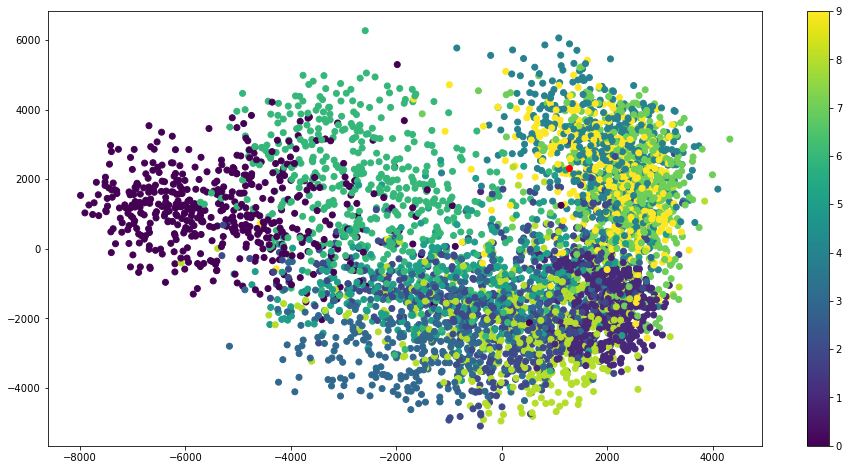

In [31]:
point_number = 3
point = points.iloc[point_number].values
plt.matshow(point.reshape(28, -1)) 
plt.show() 
point = point.reshape(1,-1)
transformed_point = model.transform(point)

plt.figure(figsize=(16,8))
plt.scatter(transformed_train_data[:, 0], transformed_train_data[:, 1], c=color)
plt.colorbar()
plt.scatter(transformed_point[:, 0], transformed_point[:, 1], c='r')

Можно попробовать другую цифру:

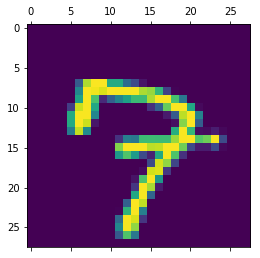

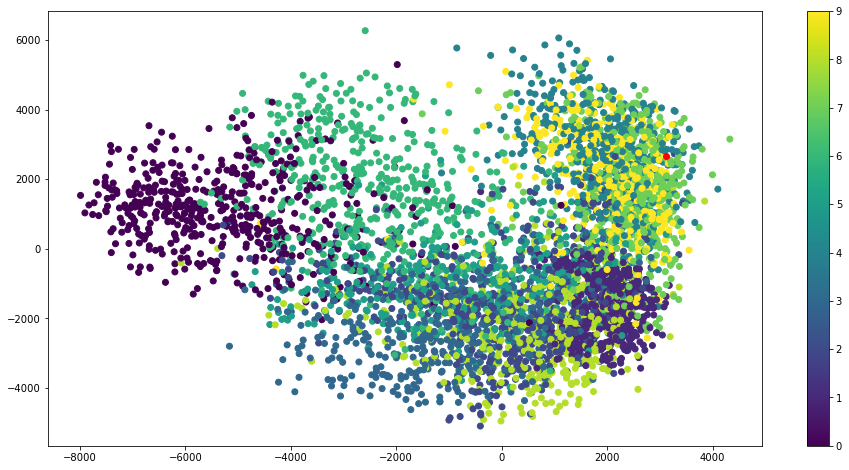

In [32]:
point_number = 5
point = points.iloc[point_number].values
plt.matshow(point.reshape(28, -1)) 
plt.show() 
point = point.reshape(1,-1)
transformed_point = model.transform(point)

plt.figure(figsize=(16,8))
plt.scatter(transformed_train_data[:, 0], transformed_train_data[:, 1], c=color)
plt.colorbar()
plt.scatter(transformed_point[:, 0], transformed_point[:, 1], c='r')

Семь лежит примерно в той же части, где и остальные семерки. 

### Apply Locally Linear Embedding

In [33]:
model = sklearn.manifold.LocallyLinearEmbedding(n_neighbors=10, n_components=2, method='standard', eigen_solver='auto')
transformed_train_data = model.fit_transform(train_data)

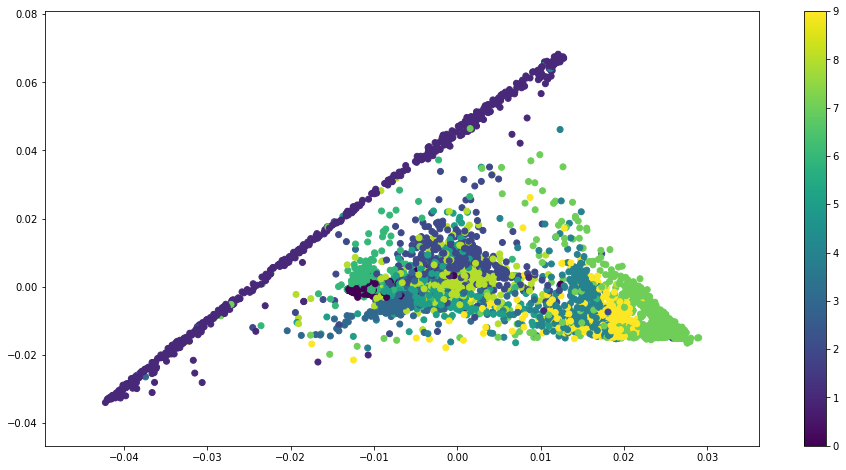

In [34]:
plt.figure(figsize=(16,8))
plt.scatter(transformed_train_data[:, 0], transformed_train_data[:, 1], c=color)
plt.colorbar()

### Apply Spectral Embedding = Laplacian Eigenmaps

In [35]:
model = sklearn.manifold.SpectralEmbedding(n_neighbors=10, n_components=2)
transformed_train_data = model.fit_transform(train_data)

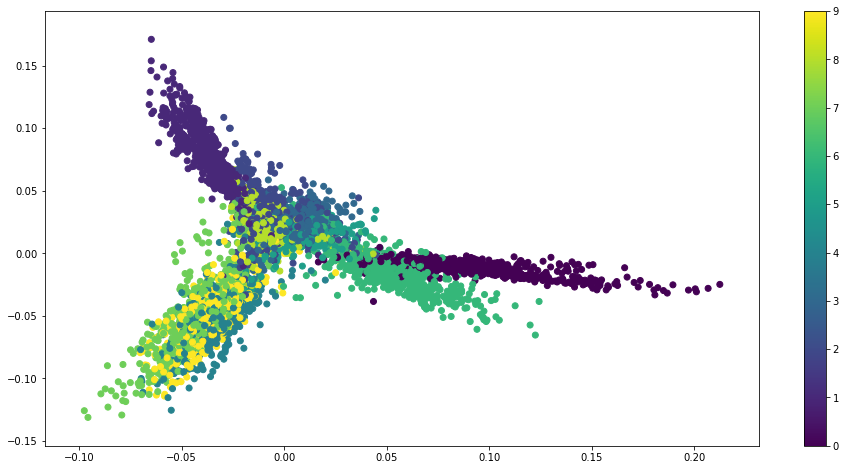

In [36]:
plt.figure(figsize=(16,8))
plt.scatter(transformed_train_data[:, 0], transformed_train_data[:, 1], c=color)
plt.colorbar()

### Apply Local Tangent Space Alignment

In [37]:
model = sklearn.manifold.LocallyLinearEmbedding(n_neighbors=10, n_components=2, method='ltsa', eigen_solver='dense')
transformed_train_data = model.fit_transform(train_data)

# model = sklearn.manifold.LocallyLinearEmbedding(n_neighbors=10, n_components=2, method='ltsa', eigen_solver='dense')

# Была RuntimeWarning: Diagonal number 11 is exactly zero. Singular matrix. 
# Нашел на форуме sklearn совет поменять число соседей. Не помогло.
# Потом прочитал в документации, что "arpack can be unstable for some problems".
# Попробовал изменить eigen_solver на'dense' и ошибки не стало. Ее причин не понял.

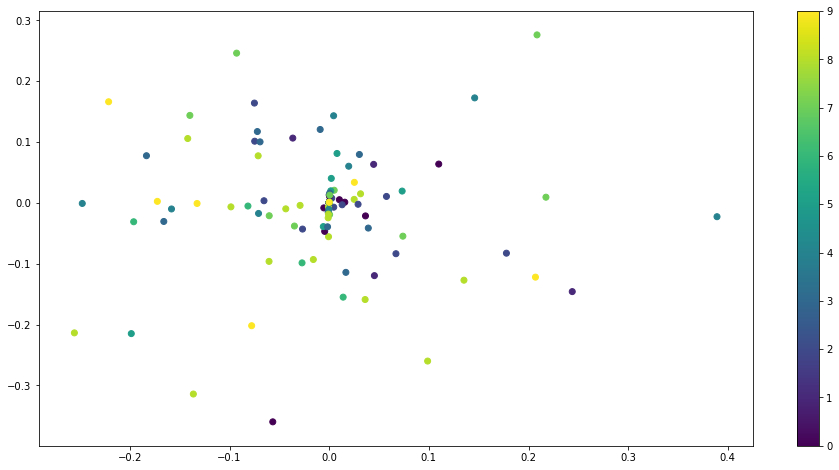

In [39]:
plt.figure(figsize=(16,8))
plt.scatter(transformed_train_data[:, 0], transformed_train_data[:, 1], c=color)
plt.colorbar()

### Apply Multi-dimensional Scaling

In [40]:
model = sklearn.manifold.MDS(max_iter=100, n_init=2)
transformed_train_data = model.fit_transform(train_data)

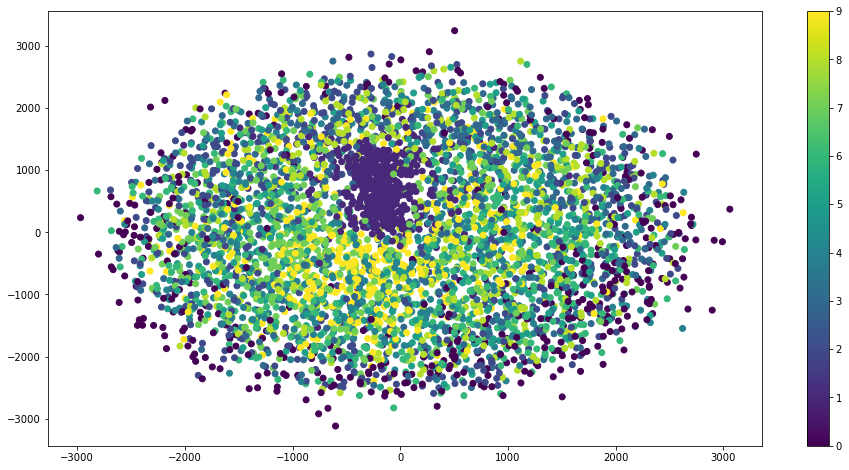

In [41]:
plt.figure(figsize=(16,8))
plt.scatter(transformed_train_data[:, 0], transformed_train_data[:, 1], c=color)
plt.colorbar()

При увеличении $n_{init}$ все стало выглядеть даже слегка более запутанным.

### Apply T-distributed Stochastic Neighbor Embedding

In [60]:
model = sklearn.manifold.TSNE(n_components=2)
transformed_train_data = model.fit_transform(train_data)

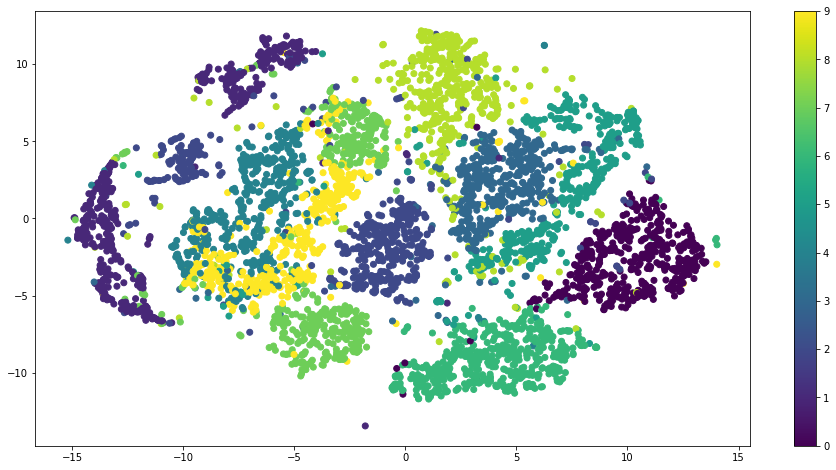

In [62]:
plt.figure(figsize=(16,8))
plt.scatter(transformed_train_data[:, 0], transformed_train_data[:, 1], c=color)
plt.colorbar()

Говорят, что метод очень чувствителен к изначальной инициализации и советуют изначально снижать размерность до адекватных пределов(в документации говорят примерно 50), чтобы избежать лишнего шума в итоге.

Если инициализировать не указывая "лишних" параметров, лишь количество компонент, то работает отлично. 

При попытки реализации как в материалах к данной работе, то есть с init='PCA' результат получился очень плохим, данные были практически перемешаны. Если же использовать только параметр количества компонент, то результат отличный, что хорошо видно на графике. 

## Make a conclusion

Легко заметить, что методы дали абсолютно разные с точки зрения качества результаты. Отличный результат у PCA, неплохой, но в целом куда более запутанный у Isomap. Достаточно странный у Local Tangent Space Alignment. Кучный у  Multi-dimensional Scaling.

Данная работа очень интересна визуализацией данных. Конечно, сама выборка дает предпосылки для возможности красивой и интуитивной визуализации данных. 

В процессе ее выполнения я прочитал пару статей о применении matpotlib и ознакомился с визуализациями некоторых алгоритмов из библиотеки sklearn, на которые наткнулся при поиске необходимой информации. Также нашел пару приемов работы с csv, вместо которых ранее использовал более громоздкие решения.

Визуализации же полезны тем, что они могут дать наглядное представление данных, на котором можно удобно сделать некоторые выводы.

В примере с Isomap для конкретной точки с помощью графиков можно легко посмотреть на качество работы алгоритма. Также смотря на визуализации в целом можно заметить интересный факт куда более сильной группировки нулей, относительно остальных цифр на всех графиках, кроме Local Tangent Space Alignment, которые в принципе отличается достаточно странным представлением. Особенно необычную форму положение нулей принимает при использовании Locally Linear Embedding. К сожалению, не могу сказать, что полностью понимаю природу данного факта.

Данное задание еще раз иллюстрирует мощность методов снижения размерностей, а также напоминает, что огромные по размерностям данные могут быть переведены в куда более компактную форму, что является очень полезным практическим выводом. Конечно, на некоторых множествах реальных данных применить данные методы возможно и не выйдет, но владение таким инструментом в любом случае полезно и дает лучшее понимание природы данных больших размерностей и возможностей их представления.

Также данная работа поволяет получить практический опыт решения задач анализа данных, то есть работы с датасетами, использованием мощных библиотек алгоритмов языка python, представлением данных и последующими выводами из полученных результатов.